# Mise en pratique - Utilisation de GeoPandas et Rasterio

Import des bibliothèques nécessaires :

In [1]:
import geopandas as gpd
import rasterio as rio
import matplotlib.pyplot as plt
from rasterio.plot import show

Import du fond de carte des communes :

In [2]:
communes = gpd.read_file('../data/COMMUNE.shp')
communes.head()

,ID,INSEE_COM,INSEE_ARR,INSEE_COL,INSEE_DEP,INSEE_REG,POPULATION,SURFACE_HA,DATE_CREAT,DATE_MAJ,...,CL_DEPART,CL_REGION,CAPITALE,DATE_RCT,RECENSEUR,SIREN_EPCI,ID_CH_LIEU,ID_AUT_ADM,CODE_SIREN,geometry
0,COMMUNE_0000000009754200,38359,1,38D,38,84,1197,3622,2006-08-02 08:36:54,2023-01-20 10:57:47,...,Non,Non,Non,2020-01-01,INSEE,200070431,PAIHABIT0000000007545622,SURFACTI0000000007463791,200054526,"POLYGON ((872007.300 6454019.300, 872006.300 6..."
1,COMMUNE_0000000009755669,38243,1,38D,38,84,247,1499,2006-08-02 08:36:54,2023-02-14 10:36:40,...,Non,Non,Non,2020-01-01,INSEE,200030658,PAIHABIT0000000007548437,SURFACTI0000000042499727,213802432,"POLYGON ((907510.800 6409545.700, 907506.100 6..."
2,COMMUNE_0000000009753737,38239,1,38D,38,84,7495,2006,2006-08-02 08:36:54,2023-01-18 18:39:43,...,Non,Non,Non,2020-01-01,INSEE,243800984,PAIHABIT0000000007542619,SURFACTI0000000007463524,213802390,"POLYGON ((900804.200 6475473.300, 900816.800 6..."
3,COMMUNE_0000000009755432,05064,2,05D,05,93,105,10802,2006-08-02 08:36:54,2023-01-18 18:39:43,...,Non,Non,Non,2020-01-01,INSEE,200068096,PAIHABIT0000000075658095,SURFACTI0000000118484062,210500641,"POLYGON ((950358.400 6422049.800, 950358.000 6..."
4,COMMUNE_0000000009754591,38237,1,38D,38,84,190,1460,2006-08-02 08:36:54,2023-01-18 18:39:43,...,Non,Non,Non,2020-01-01,INSEE,243800745,PAIHABIT0000000007546970,SURFACTI0000000007463883,213802374,"POLYGON ((946870.000 6443476.500, 946851.600 6..."


<Axes: >

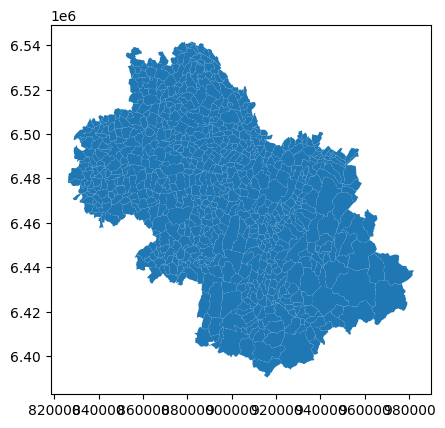

In [3]:
communes.plot()

Import du jeu de données des cours d'eau de l'Isère :

In [4]:
cours_deau = gpd.read_file('../data/COURS_D_EAU.shp')
cours_deau.head()

,ID,CODE_HYDRO,TOPONYME,STATUT_TOP,IMPORTANCE,DATE_CREAT,DATE_MAJ,DATE_APP,DATE_CONF,SOURCE,ID_SOURCE,STATUT,MAREE,PERMANENT,COMMENT,geometry
0,COURDEAU0000002215479238,06C0000002215479238,Canal de Pulivès,Validé,5,2020-10-21 09:35:44,2020-11-12 10:46:00,None,None,None,None,Validé,None,None,None,"LINESTRING (847280.500 6505594.500, 847273.400..."
1,COURDEAU0000002000792297,06C0000002000792297,Torrent du Clot des Cavales,Validé,5,2017-01-24 16:06:18,2022-06-03 22:58:45,None,None,None,None,Validé,None,None,None,"LINESTRING (963060.600 6437049.700, 963068.600..."
2,COURDEAU0000002215478774,06C0000002215478774,le Bouveyron,Validé,5,2020-10-21 09:35:44,2020-11-12 10:46:00,None,None,None,None,Validé,None,None,None,"LINESTRING (895311.900 6452665.700, 895271.300..."
3,COURDEAU0000002000803076,06C0000002000803076,Ruisseau de la Combe de Mouze,Validé,5,2017-01-24 16:06:18,2020-09-28 10:34:31,None,None,None,None,Validé,None,None,None,"LINESTRING (878398.000 6459581.500, 878400.900..."
4,COURDEAU0000002215480545,06C0000002215480545,le Pachoux,Validé,5,2020-10-21 09:35:44,2020-11-12 10:46:00,None,None,None,None,Validé,None,None,None,"LINESTRING (945273.400 6484691.600, 945299.600..."


<Axes: >

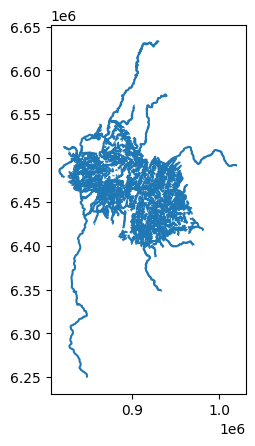

In [5]:
cours_deau.plot()

Import du MNT de la zone de Grenoble et des alentours :

In [6]:
mnt = rio.open('../data/DEM_N245E395_l93.tif')
print(mnt.meta)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': 3.4028234663852886e+38, 'width': 2393, 'height': 2000, 'count': 1, 'crs': CRS.from_epsg(2154), 'transform': Affine(22.625939867401588, 0.0, 876147.6561479433,
       0.0, -27.206653628468978, 6496734.7862259)}


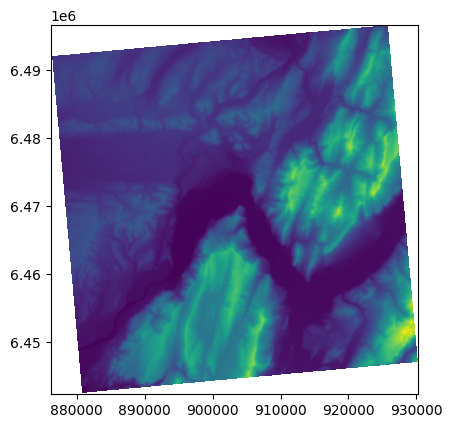

<Axes: >

In [7]:
show(mnt)

Étapes nécessaires pour l'affichage du profil en long du *Canal du Furon* :

In [8]:
# On récupère une référence à l'entité avec le toponyme "Canal du Furon"
canal_furon = cours_deau[cours_deau.TOPONYME == 'Canal du Furon'].iloc[0]
# On stocke sa géomtrie dans une variable
geom_canal_furon = canal_furon['geometry']

# geom est la géométrie récupérée plus tôt
length = geom_canal_furon.length

# combien de points :
nb_points = 50 

# quelle distance entre les points :
step = length / (nb_points - 1)

# Deux listes, pour stocker les distances à la source
# et les coordonnées 
dists = []
coords = []

# On génère des points à `step` distance de la source,
# le long de la géométrie du cours d'eau
for dist in range(0, int(length), int(step)):
    # On calcul la position du point
    pt = geom_canal_furon.interpolate(dist)
    # Récupération des coordonnées du points sous forme d'un tuple :
    c = pt.coords[0]
    # On ajoute le résultat
    coords.append(c)
    dists.append(dist)

# Liste qui va contenir le résultat final,
# sous forme de tuple de 2 éléments (distance à la source, altitude)
result = []

# On donne une liste de coordonnées la méthode "sample"
# de notre mnt, et on parcours le résultat
for i, value in enumerate(mnt.sample(coords)):
    result.append((dists[i], value[0]))

print(result)


[(0, 1425.7377), (437, 1362.941), (874, 1312.1956), (1311, 1290.5577), (1748, 1225.8474), (2185, 1164.4419), (2622, 1124.573), (3059, 1111.7539), (3496, 1051.6694), (3933, 1022.22516), (4370, 1004.3961), (4807, 981.4957), (5244, 971.6164), (5681, 967.7894), (6118, 955.43756), (6555, 970.6986), (6992, 973.53284), (7429, 966.6809), (7866, 956.42053), (8303, 911.60754), (8740, 898.0838), (9177, 897.07367), (9614, 890.5755), (10051, 885.98413), (10488, 879.15765), (10925, 879.4802), (11362, 853.3081), (11799, 848.3095), (12236, 833.22424), (12673, 785.61456), (13110, 752.5231), (13547, 711.05975), (13984, 678.70056), (14421, 604.9606), (14858, 556.44476), (15295, 534.45703), (15732, 545.5055), (16169, 393.02655), (16606, 334.85504), (17043, 229.89719), (17480, 208.64926), (17917, 205.8491), (18354, 208.43661), (18791, 203.1874), (19228, 203.81535), (19665, 202.07422), (20102, 202.07265), (20539, 200.99963), (20976, 202.91989), (21413, 198.85019)]


Affichons le graphique correspondant

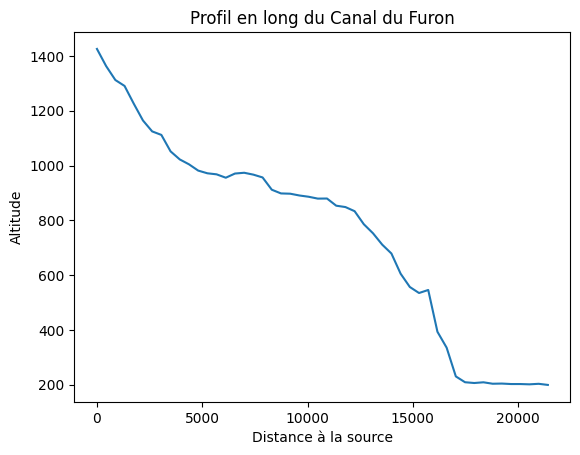

In [9]:
plt.plot([i[0] for i in result], [i[1] for i in result])
plt.title('Profil en long du Canal du Furon')
plt.xlabel('Distance à la source')
plt.ylabel('Altitude')
plt.show()

<hr />

## Exercice 1

Soit la variable `nom_cours_deau` définie ci-dessous.
Copiez le code précédent et adaptez le afin de créez le profil en long du cours d'eau dont le nom est stocké dans la variable `nom_cours_deau` (vous devez donc utiliser cette variable pour extraire la géomtrie du cours d'eau d'intérêt, ainsi que pour définir le titre du graphique à créer).

Essayez de change la couleur de la ligne qui est dessinée si vous le souhaitez ! (indice : [une recherche sur un moteur de recherche](https://www.qwant.com/?q=matplotlib+change+color+line&t=web) - `matplotlib` est une bibliothèque très populaire et il est aisé de trouver des informations à son sujet sur le Web)

In [10]:
nom_cours_deau = 'le Guiers Vif'

### Solution :

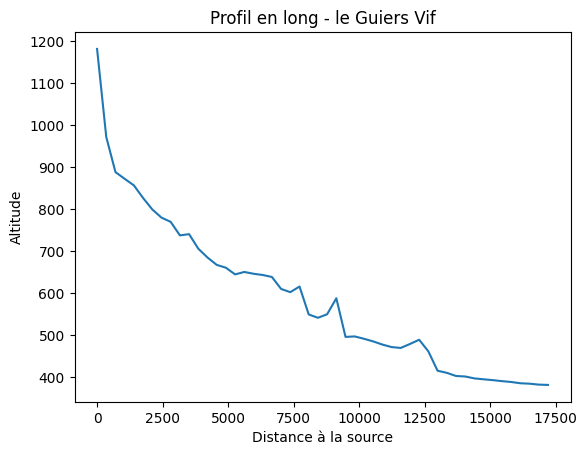

In [12]:
# On récupère une référence à l'entité avec le toponyme stocké dans la variable
feature = cours_deau[cours_deau.TOPONYME == nom_cours_deau].iloc[0]
# On stocke sa géomtrie dans une variable
geom = feature['geometry']

# geom est la géométrie récupérée plus tôt
length = geom.length

# combien de points :
nb_points = 50 

# quelle distance entre les points :
step = length / (nb_points - 1)

# Deux listes, pour stocker les distances à la source
# et les coordonnées 
dists = []
coords = []

# On génère des points à `step` distance de la source,
# le long de la géométrie du cours d'eau
for dist in range(0, int(length), int(step)):
    # On calcul la position du point
    pt = geom.interpolate(dist)
    # Récupération des coordonnées du points sous forme d'un tuple :
    c = pt.coords[0]
    # On ajoute le résultat
    coords.append(c)
    dists.append(dist)

# Liste qui va contenir le résultat final,
# sous forme de tuple de 2 éléments (distance à la source, altitude)
result = []

# On donne une liste de coordonnées la méthode "sample"
# de notre mnt, et on parcours le résultat
for i, value in enumerate(mnt.sample(coords)):
    result.append((dists[i], value[0]))

plt.plot([i[0] for i in result], [i[1] for i in result])
plt.title(f'Profil en long - {nom_cours_deau}')
plt.xlabel('Distance à la source')
plt.ylabel('Altitude')
plt.show()

## Exercice 2

Soit la variable `noms` définie ci-dessous. Elle contient une liste de noms de cours d'eau.
Faites une boucle parcourant cette liste afin de créez le profil en long de chacun des cours d'eau qui y figure.

Grâce à l'exemple fourni et grâce à l'exercice 1, vous devrez avoir identifié quelle partie du code peut-être réutilisé. N'hésitez pas à l'emballer dans une fonction que vous pourrez nommer `affiche_profil` et qui prendra un argument, le nom du cours d'eau.

In [13]:
noms = [
    'le Guiers Vif',
    'Canal de l\'Herretang',
    'Torrent du Manival',
    'Ruisseau du Canard',
    'la Fure',
]

### Solution :

In [15]:
def affiche_profil(nom_cours_deau):
    # On récupère une référence à l'entité avec le toponyme stocké dans la variable
    feature = cours_deau[cours_deau.TOPONYME == nom_cours_deau].iloc[0]
    # On stocke sa géomtrie dans une variable
    geom = feature['geometry']

    # geom est la géométrie récupérée plus tôt
    length = geom.length

    # combien de points :
    nb_points = 50 

    # quelle distance entre les points :
    step = length / (nb_points - 1)

    # Deux listes, pour stocker les distances à la source
    # et les coordonnées 
    dists = []
    coords = []

    # On génère des points à `step` distance de la source,
    # le long de la géométrie du cours d'eau
    for dist in range(0, int(length), int(step)):
        # On calcul la position du point
        pt = geom.interpolate(dist)
        # Récupération des coordonnées du points sous forme d'un tuple :
        c = pt.coords[0]
        # On ajoute le résultat
        coords.append(c)
        dists.append(dist)

    # Liste qui va contenir le résultat final,
    # sous forme de tuple de 2 éléments (distance à la source, altitude)
    result = []

    # On donne une liste de coordonnées la méthode "sample"
    # de notre mnt, et on parcours le résultat
    for i, value in enumerate(mnt.sample(coords)):
        result.append((dists[i], value[0]))

    plt.plot([i[0] for i in result], [i[1] for i in result])
    plt.title(f'Profil en long - {nom_cours_deau}')
    plt.xlabel('Distance à la source')
    plt.ylabel('Altitude')
    plt.show()

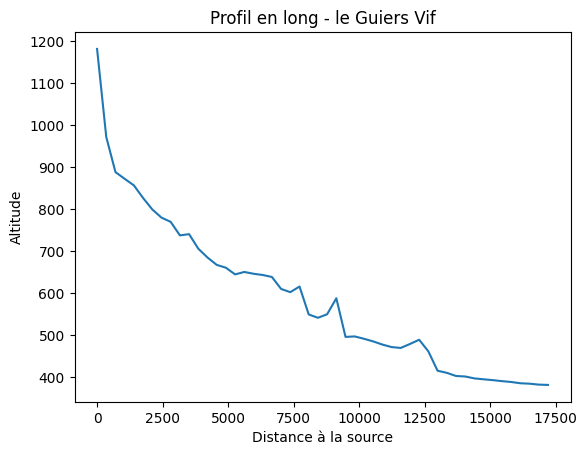

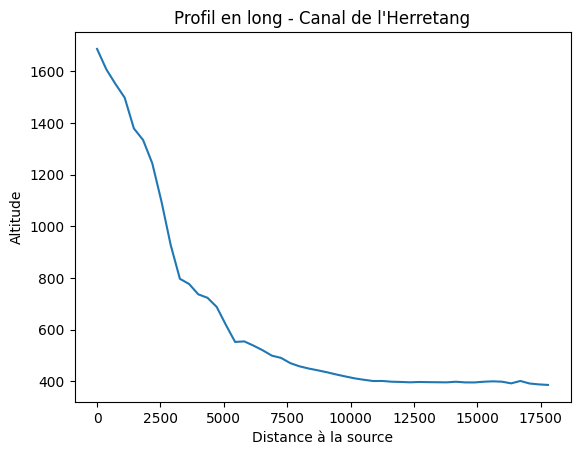

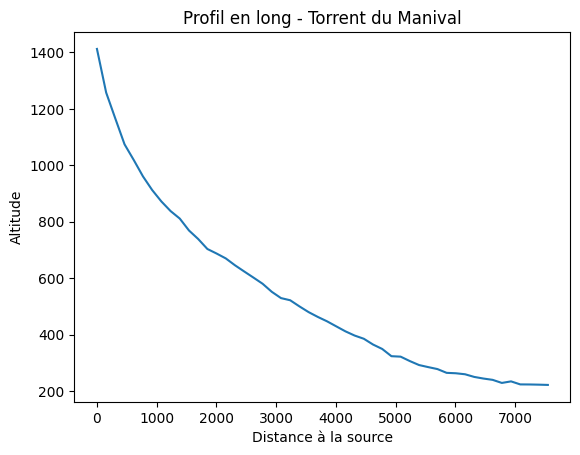

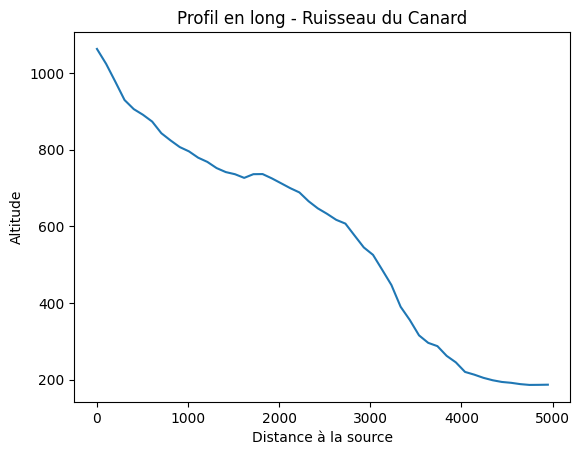

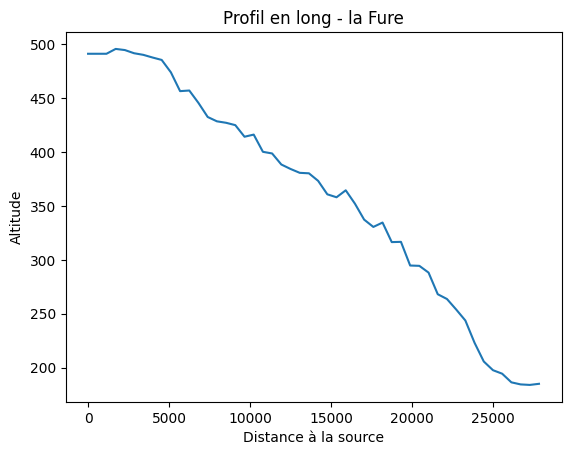

In [16]:
for nom in noms:
    affiche_profil(nom)